In [10]:
import geopandas as gpd
from matplotlib import pyplot as plt


In [28]:
data = gpd.read_file("./results/resubmission/durham_july2022_eve_tract.shp")

data.head()

,geoid,income,area,population,num_statio,tempAvg,m1_temp,m1_temp_st,m2_temp,m2_temp_st,geometry
0,37063000101,72382.0,3370322,3716,1,27.953571,27.912387,0.382233,27.990374,0.346731,"POLYGON ((-78.89489 36.02991, -78.89343 36.030..."
1,37063000102,51488.0,3998235,3702,2,28.412963,28.109402,0.396710,28.110274,0.407137,"POLYGON ((-78.91655 36.02532, -78.91635 36.025..."
2,37063000200,52375.0,3021171,3309,0,NaN,27.918187,0.409336,28.211189,0.414679,"POLYGON ((-78.90299 36.00574, -78.90253 36.006..."
3,37063000301,41750.0,1586355,2826,0,NaN,28.067571,0.449727,28.160000,0.430168,"POLYGON ((-78.91957 36.01043, -78.91949 36.011..."
4,37063000302,92500.0,1722150,3515,1,28.495833,28.197684,0.441966,28.216624,0.391440,"POLYGON ((-78.91246 36.00396, -78.91243 36.004..."


In [29]:
data = data[data['population'] > 0]

27.800434798140067 0.23352209473613605


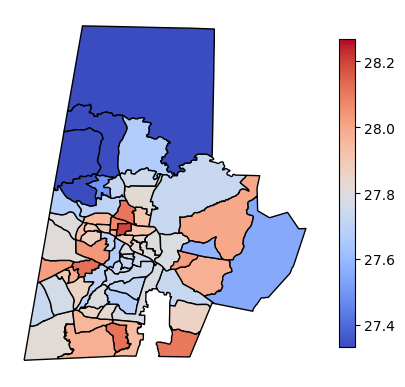

In [30]:
mu = data['m1_temp'].mean()
std = data['m2_temp'].std()
print(mu, std)

data.plot(column='m1_temp', edgecolor='black', legend=True, figsize=(5,5), cmap='coolwarm', legend_kwds={'shrink':0.8}, vmax=mu + 2*std, vmin=mu - 2*std)
plt.axis('off')
plt.savefig('./results/figures/census_tract_2022/model_1_block_group.pdf', bbox_inches='tight', dpi=300)

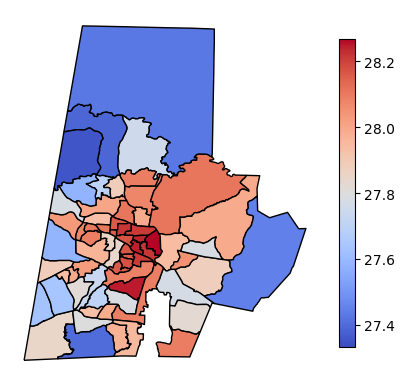

In [31]:
data.plot(column='m2_temp', edgecolor='black', legend=True, figsize=(5,5), cmap='coolwarm', legend_kwds={'shrink':0.8}, vmax=mu + 2*std, vmin=mu - 2*std)
plt.axis('off')
plt.savefig('./results/figures/census_tract_2022/model_2_block_group.pdf', bbox_inches='tight', dpi=300)

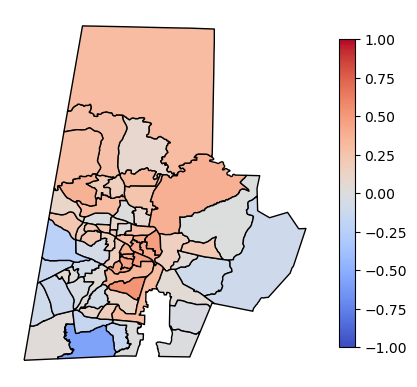

In [32]:
data['diff'] = data['m2_temp'] - data['m1_temp']

data.plot(column='diff', edgecolor='black', legend=True, figsize=(5,5), cmap='coolwarm', legend_kwds={'shrink':0.8}, vmax=1., vmin=-1.)
plt.axis('off')
# Save the figure
plt.savefig('./results/figures/census_tract_2022/model_diff.pdf', bbox_inches='tight', dpi=300)

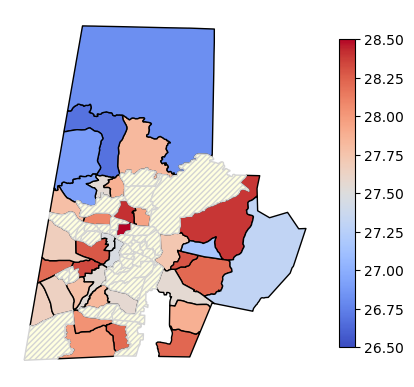

In [33]:
data.plot(column='tempAvg', legend=True, edgecolor='black', figsize=(5,5), missing_kwds={'color':'lightyellow', 'hatch':'//////', 'edgecolor':'lightgrey'},cmap='coolwarm', legend_kwds={'shrink':0.8}, vmax=28.5, vmin=26.5)
# plt.legend()
plt.axis('off')
plt.savefig('./results/figures/census_tract_2022/eve_avg_block_group.pdf', bbox_inches='tight', dpi=300)